# NCAR Innovator Program Project
### Notebook by: Maria J. Molina (NCAR/University of Maryland) and Jessica Moulite (Howard University)

Here we compare the NOAA Laguardia Airport weather station temperature data with 2-m temperature data from ERA5. The objective of the comparison is to assess how representative state-of-the-art reanalysis is of local weather and trends, given its heavy use in climate assessment studies.

Importing packages

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Functions

In [2]:
def cel_to_far(tmp):
    """
    Convert celsius to farenheit
    """
    newtmp = []
    for i in tmp:
        if i == 99.9:
            newtmp.append(np.nan)
        if i != 99.9:
            newtmp.append((i * (9/5)) + 32)
    return np.array(newtmp)


def cel_to_nan(tmp):
    """
    Change 9999 to np.nan
    """
    newtmp = []
    for i in tmp:
        if i == 99.9:
            newtmp.append(np.nan)
        if i != 99.9:
            newtmp.append(i)
    return np.array(newtmp)


def convert_to_datetime(time_value):
    """
    Convert to a datetime object to be able to compute time difference.
    """
    return datetime.datetime(
        pd.to_datetime(time_value).year,
        pd.to_datetime(time_value).month,
        pd.to_datetime(time_value).day,
        pd.to_datetime(time_value).hour,
        pd.to_datetime(time_value).minute,
        pd.to_datetime(time_value).second,
    )


def compute_time_difference(a, b):
    """
    Compute time difference between two times.
    """
    if a >= b:
        return convert_to_datetime(a) - convert_to_datetime(b)
    if b > a:
        return convert_to_datetime(b) - convert_to_datetime(a)


def extract_era5_time(t_daily, t_full):
    """
    Extract the era5 temperature corresponding time.
    """
    era5_time_array = []

    for i, j in zip(t_daily.time, t_daily):

        tmp = t_full.sel(
            time=slice(i, pd.to_datetime(i.values) + datetime.timedelta(hours=23)))

        era5_time_array.append(tmp.where(tmp == j, drop=True).time.values)

    return era5_time_array

## Open ERA5 data (1973-present)

In [3]:
# open files
ds_ = xr.open_mfdataset(
    '/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.sfc/*/e5.oper.an.sfc.128_167_2t.ll025sc.*.nc')['VAR_2T']

In [4]:
ds_

<xarray.DataArray 'VAR_2T' (time: 501120, latitude: 721, longitude: 1440)>
dask.array<concatenate, shape=(501120, 721, 1440), dtype=float32, chunksize=(744, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1965-04-01 ... 2022-05-31T23:00:00
Attributes: (12/14)
    long_name:                                          2 metre temperature
    short_name:                                         2t
    units:                                              K
    original_format:                                    WMO GRIB 1 with ECMWF...
    ecmwf_local_table:                                  128
    ecmwf_parameter:                                    167
    ...                                                 ...
    grid_specification:                                 0.25 degree x 0.25 de...
    rda_dataset:                                        ds633.0
    rda_dataset_url:                                    https:/rda.ucar.edu/d...
    rda_dataset_doi:                                    DOI: 10.5065/BH6N-5N20
    rda_dataset_group:                                  ERA5 atmospheric surf...
    QuantizeGranularBitGroomNumberOfSignificantDigits:  7

## Open NOAA station data

In [5]:
LGA_temp = pd.read_csv('/glade/scratch/molina/3043184.csv', low_memory=False)

In [6]:
LGA_temp

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,RH3,SA1,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND
0,72503014732,"LAGUARDIA AIRPORT, NY US",40.77944,-73.88035,3.4,1973-01-01T00:00:00,C,SY-SA,LGA,V020,...,NaN,NaN,"10196,5",C,"+0111,5",NaN,NaN,"004800,5,N,9",NaN,"190,5,N,0057,5"
1,72503014732,"LAGUARDIA AIRPORT, NY US",40.77944,-73.88035,3.4,1973-01-01T01:00:00,D,SAO,LGA,V020,...,NaN,NaN,"10190,1",D,"+0120,1",NaN,NaN,"004800,1,N,9",NaN,"150,1,N,0046,1"
2,72503014732,"LAGUARDIA AIRPORT, NY US",40.77944,-73.88035,3.4,1973-01-01T02:00:00,D,SAO,LGA,V020,...,NaN,NaN,"10186,1",D,"+0120,1",NaN,NaN,"004800,1,N,9",NaN,"180,1,N,0056,1"
3,72503014732,"LAGUARDIA AIRPORT, NY US",40.77944,-73.88035,3.4,1973-01-01T03:00:00,C,SAO,LGA,V020,...,NaN,NaN,"10183,5",C,"+0117,5",NaN,NaN,"004800,5,N,9",NaN,"170,5,N,0057,5"
4,72503014732,"LAGUARDIA AIRPORT, NY US",40.77944,-73.88035,3.4,1973-01-01T04:00:00,D,SAO,LGA,V020,...,NaN,NaN,"10173,1",D,"+0120,1",NaN,NaN,"009000,1,N,9",NaN,"170,1,N,0051,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614698,72503014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-08-02T04:51:00,6,FM-15,KLGA,V020,...,NaN,NaN,"10106,5",6,"+0222,5",NaN,NaN,"016093,5,N,5",NaN,"200,5,N,0031,5"
614699,72503014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-08-02T04:59:00,6,SOD,KLGA,V020,...,NaN,NaN,"99999,9",6,"+9999,9",NaN,NaN,"999999,9,9,9",NaN,"999,9,9,9999,9"
614700,72503014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-08-02T05:51:00,6,FM-15,KLGA,V020,...,NaN,NaN,"10105,5",6,"+0222,5",NaN,NaN,"016093,5,N,5",NaN,"190,5,N,0041,5"
614701,72503014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-08-02T06:51:00,6,FM-15,KLGA,V020,...,NaN,NaN,"10099,5",6,"+0222,5",NaN,NaN,"016093,5,N,5",NaN,"200,5,N,0031,5"


In [7]:
# subset the data using dates of interest (what is available in ERA5)
LGA_temp = LGA_temp[(
    LGA_temp['DATE'] >= str(
        pd.to_datetime(ds_.coords['time'].isel(time=0).values))) & (
    LGA_temp['DATE'] <= str(
        pd.to_datetime(ds_.coords['time'].isel(time=-1).values)))]

In [8]:
time_date = []
temperature_C = []

for j, i in zip(LGA_temp['DATE'].values, LGA_temp['TMP'].values.astype(str)):

    time_date.append(j)

    # convert the string format to decimal format (originally in METAR code)
    temperature_C.append(
        float(i[0]+i.split(',')[0][2:-1]+'.'+i.split(',')[0][-1]))

time_date = np.array(time_date)
temperature_C = np.array(temperature_C)

temperature_F = cel_to_far(temperature_C)
temperature_C = cel_to_nan(temperature_C)

In [9]:
# making into dataframe for easier manipulation

# initialize data of lists.
data = {'Datetime': pd.to_datetime(time_date),
        'Temperature_C': temperature_C,
        'Temperature_F': temperature_F,
        'Latitude': LGA_temp['LATITUDE'],
        'Longitude': LGA_temp['LONGITUDE'],
       }

# Create DataFrame and quality control
df = pd.DataFrame(data)
df = df.dropna()  # drop any nan values
df = df.drop_duplicates(keep='first')
# drop any duplicate rows
df = df[~df['Datetime'].duplicated()].drop_duplicates()

## Select temperatures from ERA5 using NOAA metadata (lat, lon, and hour)

In [ ]:
ERA5_temperatures_C = []
ERA5_date = []

for lat, lon, date in zip(df['Latitude'], df['Longitude'] % 360, df['Datetime']):

    tmp = ds_.sel(longitude=lon, latitude=lat, time=date, method='nearest')

    ERA5_temperatures_C.append((tmp - 273.15).values)

    ERA5_date.append(tmp.coords['time'].values)

In [ ]:
ERA5_temperatures_C = np.array(ERA5_temperatures_C)

In [ ]:
ERA5_temperatures_F = cel_to_far(ERA5_temperatures_C)

In [ ]:
# initialize data of lists.
data = {'Datetime': pd.to_datetime(ERA5_date),
        'Temperature_C': ERA5_temperatures_C,
        'Temperature_F': ERA5_temperatures_F,
       }

df_era5 = pd.DataFrame(data)

In [ ]:
# drop duplicate rows
df = df[~df_era5['Datetime'].duplicated().values]
df_era5 = df_era5[~df_era5['Datetime'].duplicated()].drop_duplicates()

### clean up dates prior to computation of metrics

In [15]:
df

,Datetime,Temperature_C,Temperature_F,Latitude,Longitude
0,1973-01-01 00:00:00,11.1,51.98,40.77944,-73.88035
1,1973-01-01 01:00:00,12.0,53.60,40.77944,-73.88035
2,1973-01-01 02:00:00,12.0,53.60,40.77944,-73.88035
3,1973-01-01 03:00:00,11.7,53.06,40.77944,-73.88035
4,1973-01-01 04:00:00,12.0,53.60,40.77944,-73.88035
...,...,...,...,...,...
612405,2022-05-30 19:51:00,28.9,84.02,40.77945,-73.88027
612406,2022-05-30 20:51:00,28.3,82.94,40.77945,-73.88027
612408,2022-05-30 21:51:00,27.8,82.04,40.77945,-73.88027
612409,2022-05-30 22:51:00,26.1,78.98,40.77945,-73.88027


In [16]:
df_era5

,Datetime,Temperature_C,Temperature_F
0,1973-01-01 00:00:00,12.734400,54.921920
1,1973-01-01 01:00:00,12.607294,54.693129
2,1973-01-01 02:00:00,13.275782,55.896407
3,1973-01-01 03:00:00,13.984583,57.172249
4,1973-01-01 04:00:00,13.997095,57.194771
...,...,...,...
526618,2022-05-30 20:00:00,28.566675,83.420015
526619,2022-05-30 21:00:00,28.579645,83.443361
526621,2022-05-30 22:00:00,27.542933,81.577279
526622,2022-05-30 23:00:00,28.135126,82.643227


In [17]:
df_era5 = df_era5[(df_era5['Datetime'] <= df['Datetime'].iloc[-1])]

In [18]:
# confirm start and end dates are the same
assert df['Datetime'].iloc[0].date() == df_era5['Datetime'].iloc[0].date()
assert df['Datetime'].iloc[-1].date() == df_era5['Datetime'].iloc[-1].date()

In [19]:
df_era5

,Datetime,Temperature_C,Temperature_F
0,1973-01-01 00:00:00,12.734400,54.921920
1,1973-01-01 01:00:00,12.607294,54.693129
2,1973-01-01 02:00:00,13.275782,55.896407
3,1973-01-01 03:00:00,13.984583,57.172249
4,1973-01-01 04:00:00,13.997095,57.194771
...,...,...,...
526617,2022-05-30 19:00:00,28.509027,83.316249
526618,2022-05-30 20:00:00,28.566675,83.420015
526619,2022-05-30 21:00:00,28.579645,83.443361
526621,2022-05-30 22:00:00,27.542933,81.577279


## Create new variables

### Daily max and min temperatures

In [20]:
# Daily NOAA temperature maximum
tmax_NOAA_daily = df.set_index('Datetime').resample('1D').max()

In [21]:
# Daily ERA5 temperature maximum
tmax_ERA5_daily = df_era5.set_index('Datetime').resample('1D').max()

In [22]:
# Daily NOAA temperature minimum
tmin_NOAA_daily = df.set_index('Datetime').resample('1D').min()

In [23]:
# Daily ERA5 temperature minimum
tmin_ERA5_daily = df_era5.set_index('Datetime').resample('1D').min()

In [24]:
# double check array lengths
assert len(tmax_NOAA_daily) == len(tmax_ERA5_daily), 'Arrays not same length'
assert len(tmin_NOAA_daily) == len(tmin_ERA5_daily), 'Arrays not same length'

### Time of daily max and min temperatures

In [25]:
# corresponding date/time for NOAA daily temperature maximum
tmax_NOAA_daily_datetime = df.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmax())['Temperature_C']

# remove missing dates
tmax_NOAA_daily = tmax_NOAA_daily[~np.isnat(tmax_NOAA_daily_datetime)]
tmax_NOAA_daily_datetime = tmax_NOAA_daily_datetime[~np.isnat(tmax_NOAA_daily_datetime)]

In [26]:
# corresponding date/time for NOAA daily temperature minimum
tmin_NOAA_daily_datetime = df.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmin())['Temperature_C']

# remove missing dates
tmin_NOAA_daily = tmin_NOAA_daily[~np.isnat(tmin_NOAA_daily_datetime)]
tmin_NOAA_daily_datetime = tmin_NOAA_daily_datetime[~np.isnat(tmin_NOAA_daily_datetime)]

In [27]:
# corresponding date/time for ERA5 daily temperature maximum
tmax_ERA5_daily_datetime = df_era5.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmax())['Temperature_C']

# remove missing dates
tmax_ERA5_daily = tmax_ERA5_daily[~np.isnat(tmax_ERA5_daily_datetime)]
tmax_ERA5_daily_datetime = tmax_ERA5_daily_datetime[~np.isnat(tmax_ERA5_daily_datetime)]

In [28]:
# corresponding date/time for ERA5 daily temperature minimum
tmin_ERA5_daily_datetime = df_era5.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmin())['Temperature_C']

# remove missing dates
tmin_ERA5_daily = tmin_ERA5_daily[~np.isnat(tmin_ERA5_daily_datetime)]
tmin_ERA5_daily_datetime = tmin_ERA5_daily_datetime[~np.isnat(tmin_ERA5_daily_datetime)]

In [29]:
# double check array lengths
assert len(tmax_NOAA_daily_datetime) == len(tmax_ERA5_daily_datetime), 'Arrays not same length'
assert len(tmin_NOAA_daily_datetime) == len(tmin_ERA5_daily_datetime), 'Arrays not same length'

### Corresponding temperatures at the time of the max/min of other product

In [30]:
# the NOAA temperature during the (i.e., same time as the
# daily ERA5 maximum temperature)

NOAA_temp_during_ERA5_tmax_C = []
NOAA_temp_during_ERA5_tmax_F = []

for i in tmax_ERA5_daily_datetime.values:

    NOAA_temp_during_ERA5_tmax_C.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_C'])

    NOAA_temp_during_ERA5_tmax_F.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_F'])

NOAA_temp_during_ERA5_tmax_C = np.array(NOAA_temp_during_ERA5_tmax_C)
NOAA_temp_during_ERA5_tmax_F = np.array(NOAA_temp_during_ERA5_tmax_F)

In [31]:
# the NOAA temperature during the (i.e., same time as the
# daily ERA5 minimum temperature)

NOAA_temp_during_ERA5_tmin_C = []
NOAA_temp_during_ERA5_tmin_F = []

for i in tmin_ERA5_daily_datetime.values:

    NOAA_temp_during_ERA5_tmin_C.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_C'])

    NOAA_temp_during_ERA5_tmin_F.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_F'])

NOAA_temp_during_ERA5_tmin_C = np.array(NOAA_temp_during_ERA5_tmin_C)
NOAA_temp_during_ERA5_tmin_F = np.array(NOAA_temp_during_ERA5_tmin_F)

In [32]:
# the ERA5 temperature during the (i.e., same time as the
# daily NOAA maximum temperature)

ERA5_temp_during_NOAA_tmax_C = []
ERA5_temp_during_NOAA_tmax_F = []

for i in tmax_NOAA_daily_datetime.values:

    ERA5_temp_during_NOAA_tmax_C.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_C'])

    ERA5_temp_during_NOAA_tmax_F.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_F'])

ERA5_temp_during_NOAA_tmax_C = np.array(ERA5_temp_during_NOAA_tmax_C)
ERA5_temp_during_NOAA_tmax_F = np.array(ERA5_temp_during_NOAA_tmax_F)

In [33]:
# the ERA5 temperature during the (i.e., same time as the
# daily NOAA minimum temperature)

ERA5_temp_during_NOAA_tmin_C = []
ERA5_temp_during_NOAA_tmin_F = []

for i in tmin_NOAA_daily_datetime.values:

    ERA5_temp_during_NOAA_tmin_C.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_C'])

    ERA5_temp_during_NOAA_tmin_F.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_F'])

ERA5_temp_during_NOAA_tmin_C = np.array(ERA5_temp_during_NOAA_tmin_C)
ERA5_temp_during_NOAA_tmin_F = np.array(ERA5_temp_during_NOAA_tmin_F)

In [34]:
# double check array lengths
assert len(NOAA_temp_during_ERA5_tmax_C) == len(ERA5_temp_during_NOAA_tmax_C), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmin_C) == len(ERA5_temp_during_NOAA_tmin_C), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmax_F) == len(ERA5_temp_during_NOAA_tmax_F), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmin_F) == len(ERA5_temp_during_NOAA_tmin_F), 'Arrays not same length'

### differences (temperature)

In [35]:
# difference between NOAA temperature maximum and
# the ERA5 corresponding temperature at that time (C)
tmax_daily_difference_C = tmax_NOAA_daily['Temperature_C'] - ERA5_temp_during_NOAA_tmax_C

In [36]:
# difference between NOAA temperature maximum and
# the ERA5 corresponding temperature at that time (F)
tmax_daily_difference_F = tmax_NOAA_daily['Temperature_F'] - ERA5_temp_during_NOAA_tmax_F

In [37]:
# difference between NOAA temperature minimum and
# the ERA5 corresponding temperature at that time (C)
tmin_daily_difference_C = tmin_NOAA_daily['Temperature_C'] - ERA5_temp_during_NOAA_tmin_C

In [38]:
# difference between NOAA temperature minimum and
# the ERA5 corresponding temperature at that time (C)
tmin_daily_difference_F = tmin_NOAA_daily['Temperature_F'] - ERA5_temp_during_NOAA_tmin_F

### compute time differences

In [39]:
# absolute time difference between daily maximum temperature (ERA5 and NOAA)
tmax_diff = []
for i, j in zip(pd.to_datetime(tmax_NOAA_daily_datetime), tmax_ERA5_daily_datetime):
    tmax_diff.append(compute_time_difference(i, j))
tmax_diff = np.array(tmax_diff)

In [40]:
# absolute time difference between daily minimum temperature (ERA5 and NOAA)
tmin_diff = []
for i, j in zip(pd.to_datetime(tmin_NOAA_daily_datetime), tmin_ERA5_daily_datetime):
    tmin_diff.append(compute_time_difference(i, j))
tmin_diff = np.array(tmin_diff)

### create single csv file

In [41]:
data = {

    'NOAA_LGA_Temperature_Daily_Max (C)': tmax_NOAA_daily['Temperature_C'],
    'NOAA_LGA_Temperature_Daily_Max (F)': tmax_NOAA_daily['Temperature_F'],
    'NOAA_LGA_Temperature_Daily_Max_Datetime': tmax_NOAA_daily_datetime,

    'NOAA_LGA_Temperature_Daily_Min (C)': tmin_NOAA_daily['Temperature_C'],
    'NOAA_LGA_Temperature_Daily_Min (F)': tmin_NOAA_daily['Temperature_F'],
    'NOAA_LGA_Temperature_Daily_Min_Datetime': tmin_NOAA_daily_datetime,

    'ERA5_Temperature_Daily_Max (C)': tmax_ERA5_daily['Temperature_C'],
    'ERA5_Temperature_Daily_Max (F)': tmax_ERA5_daily['Temperature_F'],
    'ERA5_Temperature_Daily_Max_Datetime': tmax_ERA5_daily_datetime,

    'ERA5_Temperature_Daily_Min (C)': tmin_ERA5_daily['Temperature_C'],
    'ERA5_Temperature_Daily_Min (F)': tmin_ERA5_daily['Temperature_F'],
    'ERA5_Temperature_Daily_Min_Datetime': tmin_ERA5_daily_datetime,


    'ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Max (C)': ERA5_temp_during_NOAA_tmax_C,
    'ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Max (F)': ERA5_temp_during_NOAA_tmax_F,

    'ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Min (C)': ERA5_temp_during_NOAA_tmin_C,
    'ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Min (F)': ERA5_temp_during_NOAA_tmin_F,

    'NOAA_LGA_Corresponding_Temperature_During_ERA5_Daily_Max (C)': NOAA_temp_during_ERA5_tmax_C,
    'NOAA_LGA_Corresponding_Temperature_During_ERA5_Daily_Max (F)': NOAA_temp_during_ERA5_tmax_F,

    'NOAA_LGA_Corresponding_Temperature_During_ERA5_Daily_Min (C)': NOAA_temp_during_ERA5_tmin_C,
    'NOAA_LGA_Corresponding_Temperature_During_ERA5_Daily_Min (F)': NOAA_temp_during_ERA5_tmin_F,


    'Daily_Temperature_Max_Difference (C)': tmax_daily_difference_C.values,
    'Daily_Temperature_Max_Difference (F)': tmax_daily_difference_F.values,

    'Daily_Temperature_Min_Difference (C)': tmin_daily_difference_C.values,
    'Daily_Temperature_Min_Difference (F)': tmin_daily_difference_F.values,

    'Absolute_time_difference_tmax_ERA5_NOAA_LGA (day H:M:S)': tmax_diff,
    'Absolute_time_difference_tmin_ERA5_NOAA_LGA (day H:M:S)': tmin_diff,

       }

In [42]:
df_FINAL = pd.DataFrame(data)

In [43]:
df_FINAL

,NOAA_LGA_Temperature_Daily_Max (C),NOAA_LGA_Temperature_Daily_Max (F),NOAA_LGA_Temperature_Daily_Max_Datetime,NOAA_LGA_Temperature_Daily_Min (C),NOAA_LGA_Temperature_Daily_Min (F),NOAA_LGA_Temperature_Daily_Min_Datetime,ERA5_Temperature_Daily_Max (C),ERA5_Temperature_Daily_Max (F),ERA5_Temperature_Daily_Max_Datetime,ERA5_Temperature_Daily_Min (C),...,NOAA_LGA_Corresponding_Temperature_During_ERA5_Daily_Max (C),NOAA_LGA_Corresponding_Temperature_During_ERA5_Daily_Max (F),NOAA_LGA_Corresponding_Temperature_During_ERA5_Daily_Min (C),NOAA_LGA_Corresponding_Temperature_During_ERA5_Daily_Min (F),Daily_Temperature_Max_Difference (C),Daily_Temperature_Max_Difference (F),Daily_Temperature_Min_Difference (C),Daily_Temperature_Min_Difference (F),Absolute_time_difference_tmax_ERA5_NOAA_LGA (day H:M:S),Absolute_time_difference_tmin_ERA5_NOAA_LGA (day H:M:S)
Datetime,,,,,,,,,,,,,,,,,,,,,
1973-01-01,14.0,57.20,1973-01-01 13:00:00,10.0,50.00,1973-01-01 23:00:00,14.168665,57.503597,1973-01-01 05:00:00,7.996271,...,11.0,51.80,11.0,51.80,0.327581,0.589647,1.658728,2.985710,0 days 08:00:00,0 days 01:00:00
1973-01-02,9.4,48.92,1973-01-02 00:00:00,1.0,33.80,1973-01-02 23:00:00,8.550318,47.390572,1973-01-02 01:00:00,1.360437,...,9.0,48.20,1.0,33.80,0.873547,1.572385,-0.360437,-0.648787,0 days 01:00:00,0 days 00:00:00
1973-01-03,2.0,35.60,1973-01-03 17:00:00,-1.1,30.02,1973-01-03 12:00:00,2.630548,36.734986,1973-01-03 21:00:00,-1.638098,...,1.7,35.06,-1.0,30.20,0.049536,0.089165,0.188397,0.339115,0 days 04:00:00,0 days 01:00:00
1973-01-04,9.0,48.20,1973-01-04 14:00:00,1.0,33.80,1973-01-04 02:00:00,7.510217,45.518391,1973-01-04 17:00:00,1.182092,...,7.0,44.60,2.0,35.60,2.657294,4.783129,-0.597620,-1.075715,0 days 03:00:00,0 days 02:00:00
1973-01-05,7.2,44.96,1973-01-05 00:00:00,3.0,37.40,1973-01-05 22:00:00,6.167291,43.101124,1973-01-05 02:00:00,3.276208,...,7.0,44.60,4.0,39.20,1.324152,2.383473,-0.510644,-0.919160,0 days 02:00:00,0 days 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,20.6,69.08,2022-05-26 18:51:00,13.3,55.94,2022-05-26 06:51:00,20.893335,69.608004,2022-05-26 20:00:00,13.196680,...,20.6,69.08,13.3,55.94,-0.094727,-0.170508,-0.455640,-0.820152,0 days 01:09:00,0 days 02:09:00
2022-05-27,25.0,77.00,2022-05-27 17:51:00,17.8,64.04,2022-05-27 05:34:00,24.562586,76.212654,2022-05-27 20:00:00,18.396753,...,24.4,75.92,17.8,64.04,0.581579,1.046843,-0.764020,-1.375236,0 days 02:09:00,0 days 02:26:00
2022-05-28,25.0,77.00,2022-05-28 16:36:00,17.8,64.04,2022-05-28 03:44:00,22.865931,73.158675,2022-05-28 23:00:00,18.881800,...,23.3,73.94,18.3,64.94,3.085852,5.554533,-1.668958,-3.004124,0 days 06:24:00,0 days 03:16:00


### data visualizations

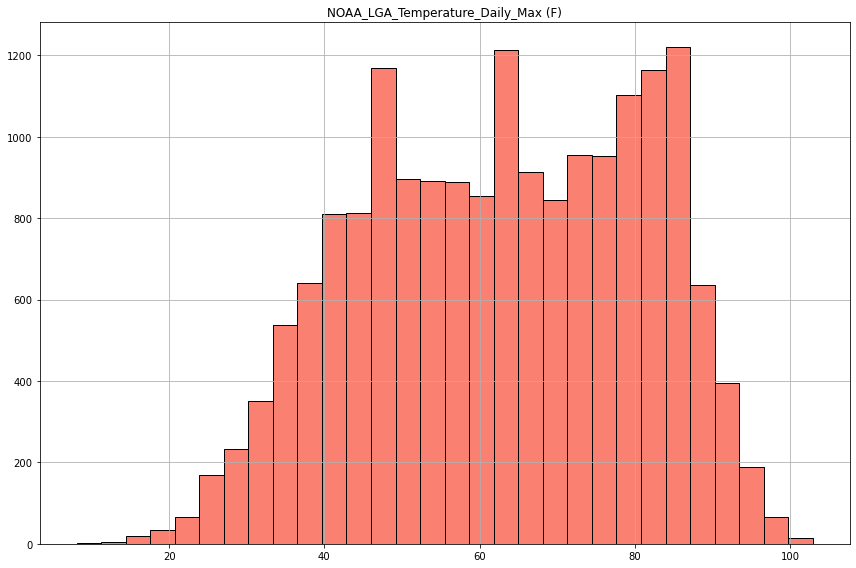

In [44]:
fig = df_FINAL.hist(
    'NOAA_LGA_Temperature_Daily_Max (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

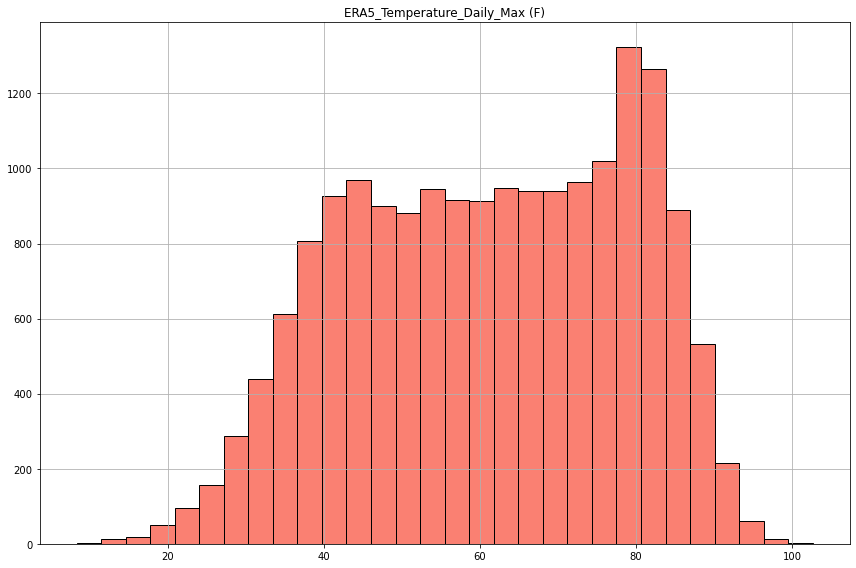

In [45]:
fig = df_FINAL.hist(
    'ERA5_Temperature_Daily_Max (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

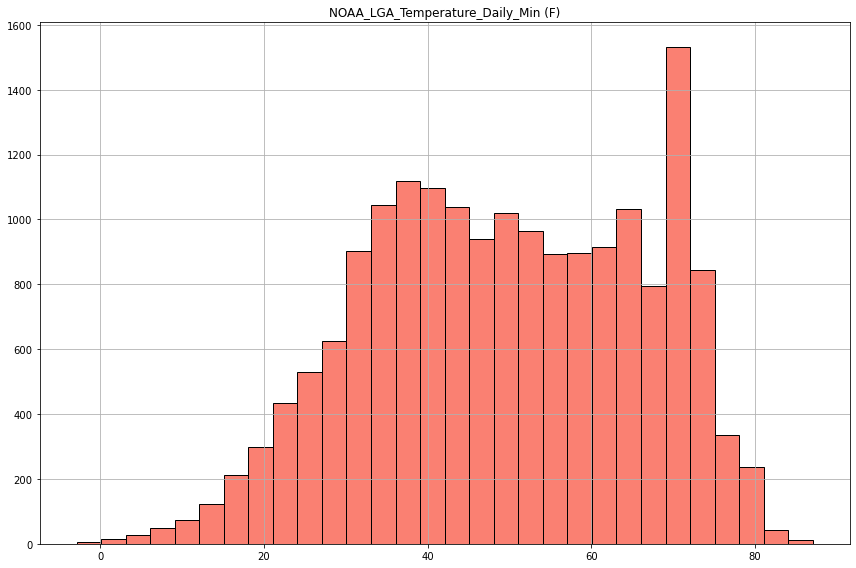

In [46]:
fig = df_FINAL.hist(
    'NOAA_LGA_Temperature_Daily_Min (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

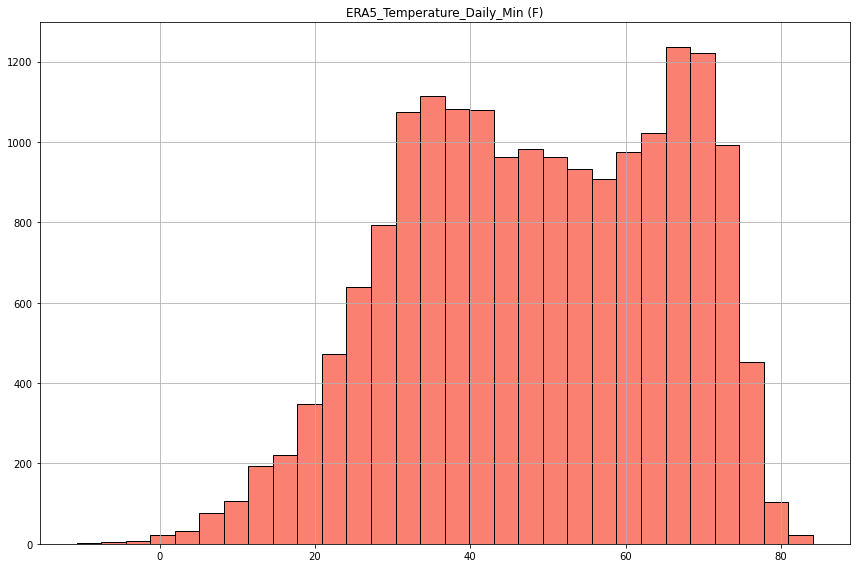

In [47]:
fig = df_FINAL.hist(
    'ERA5_Temperature_Daily_Min (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

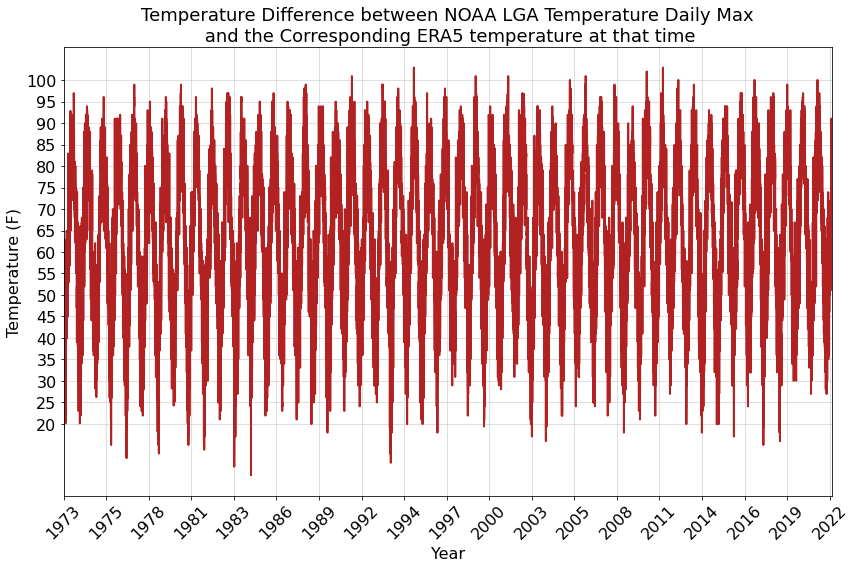

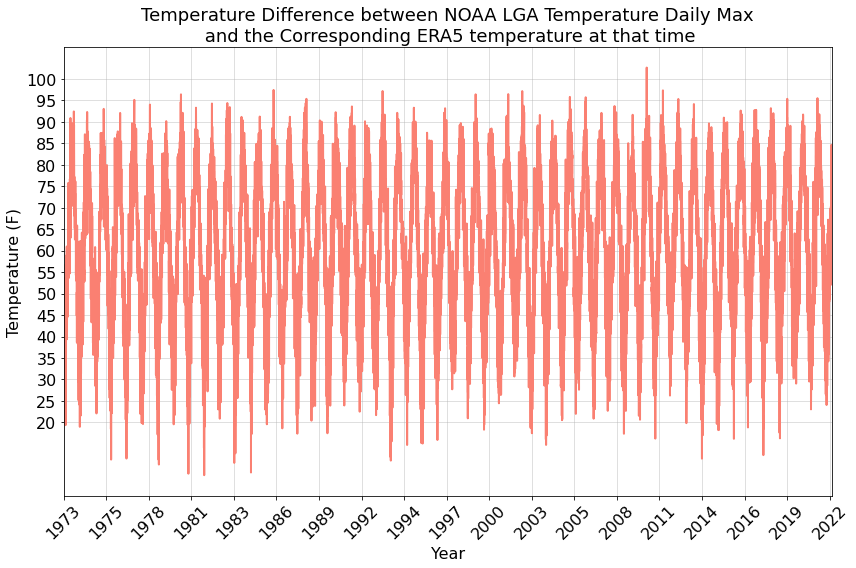

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA LGA Temperature Daily Max\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls0, = ax.plot(
    df_FINAL['NOAA_LGA_Temperature_Daily_Max (F)'].values, color='firebrick', lw=2.0)

ax.set_xticks(np.arange(
    0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Max (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(20,101,1)[::5])
ax.set_yticklabels(np.arange(20,101,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

# --

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA LGA Temperature Daily Max\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls1, = ax.plot(
    df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Max (F)'].values, color='salmon', lw=2.0)

ax.set_xticks(np.arange(
    0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Max (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(20,101,1)[::5])
ax.set_yticklabels(np.arange(20,101,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

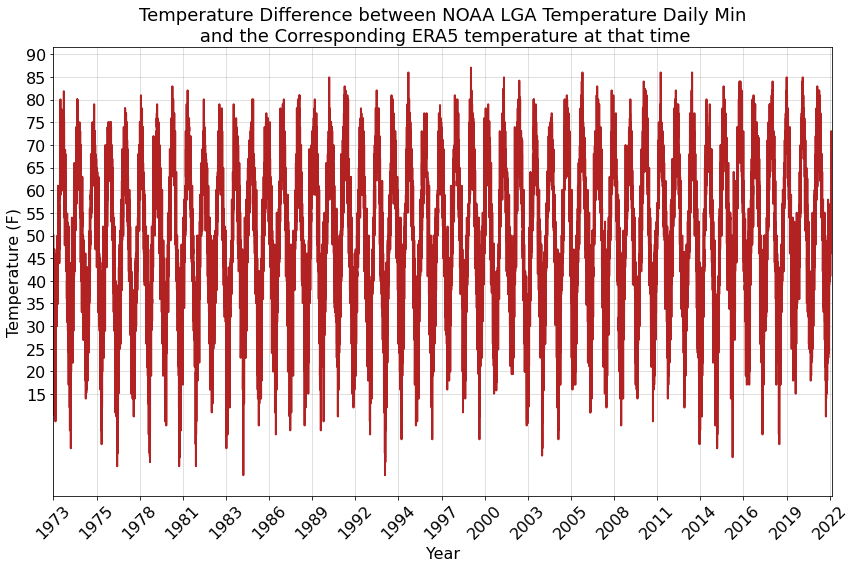

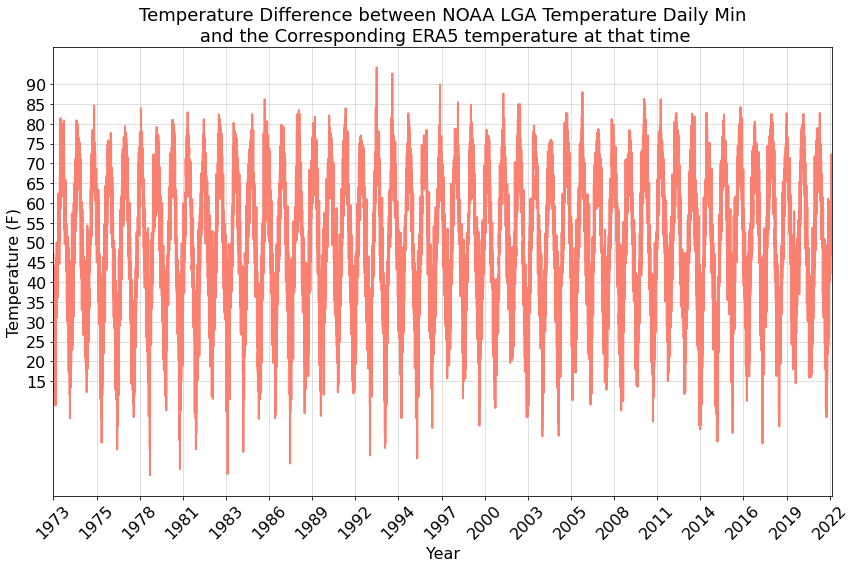

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA LGA Temperature Daily Min\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls0, = ax.plot(df_FINAL['NOAA_LGA_Temperature_Daily_Min (F)'].values, color='firebrick', lw=2.0)

ax.set_xticks(np.arange(0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Min (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(15,91,1)[::5])
ax.set_yticklabels(np.arange(15,91,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

# --

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA LGA Temperature Daily Min\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls1, = ax.plot(df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Min (F)'].values, color='salmon', lw=2.0)

ax.set_xticks(np.arange(0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_LGA_Daily_Min (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(15,91,1)[::5])
ax.set_yticklabels(np.arange(15,91,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

## save csv file

In [50]:
df_FINAL.to_csv(
    '/glade/scratch/molina/NOAA_LGA_ERA5_Temperature_1973-2022.csv')